**Imported the following libraries:** <br>
numpy <br>
pandas <br>
pandas-profiling <br>
matplotlib <br>
seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../../data/restaurants.csv')
df

,FIPS,State,County,FFR11,FFR16,PCH_FFR_11_16,FFRPTH11,FFRPTH16,PCH_FFRPTH_11_16,FSR11,FSR16,PCH_FSR_11_16,FSRPTH11,FSRPTH16,PCH_FSRPTH_11_16,PC_FFRSALES07,PC_FFRSALES12,PC_FSRSALES07,PC_FSRSALES12
0,1001,AL,Autauga,34,44,29.411765,0.615953,0.795977,29.226817,32,31,-3.125000,0.579721,0.560802,-3.263448,649.511367,674.802720,484.381507,512.280987
1,1003,AL,Baldwin,121,156,28.925620,0.648675,0.751775,15.893824,216,236,9.259259,1.157966,1.137300,-1.784662,649.511367,674.802720,484.381507,512.280987
2,1005,AL,Barbour,19,23,21.052632,0.694673,0.892372,28.459320,17,14,-17.647059,0.621549,0.543183,-12.608237,649.511367,674.802720,484.381507,512.280987
3,1007,AL,Bibb,6,7,16.666667,0.263794,0.309283,17.243995,5,7,40.000000,0.219829,0.309283,40.692794,649.511367,674.802720,484.381507,512.280987
4,1009,AL,Blount,20,23,15.000000,0.347451,0.399569,15.000000,15,12,-20.000000,0.260589,0.208471,-20.000000,649.511367,674.802720,484.381507,512.280987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,56037,WY,Sweetwater,25,31,24.000000,0.568014,0.700644,23.349802,33,32,-3.030303,0.749778,0.723246,-3.538767,656.208610,598.027144,715.635645,706.676425
3139,56039,WY,Teton,27,20,-25.925926,1.257217,0.862813,-31.371233,57,59,3.508772,2.654126,2.545298,-4.100328,656.208610,598.027144,715.635645,706.676425
3140,56041,WY,Uinta,19,17,-10.526316,0.909134,0.820820,-9.714136,25,19,-24.000000,1.196229,0.917387,-23.310125,656.208610,598.027144,715.635645,706.676425
3141,56043,WY,Washakie,7,6,-14.285714,0.827423,0.732780,-11.438342,14,12,-14.285714,1.654846,1.465559,-11.438342,656.208610,598.027144,715.635645,706.676425


Notes: <br>
column 'FIPS' gives the state/county info in a code - likely redundant information

In [4]:
df_working = df.copy()

In [5]:
variable_names = {'County' : 'county',
                  'State' : 'state',
                  'FIPS' : 'fips',
                  'FFR11':'fast_food_11', 
                  'FFR16':'fast_food_16', 
                  'PCH_FFR_11_16':'fast_food_%_ch_11_16',
                  'FFRPTH11':'fast_food_1000_11',
                  'FFRPTH16':'fast_food_1000_16',
                  'PCH_FFRPTH_11_16':'fast_food_1000_%_ch_11_16',
                  'FSR11':'full_service_11',
                  'FSR16':'full_service_16',
                  'PCH_FSR_11_16':'full_service_%_ch_11_16',
                  'FSRPTH11':'full_service_1000_11',
                  'FSRPTH16':'full_service_1000_16',
                  'PCH_FSRPTH_11_16': 'full_service_1000_%_ch_11_16',
                  'PC_FFRSALES07':'fast_food_exp_percap_07',
                  'PC_FFRSALES12':'fast_food_exp_percap_12',
                  'PC_FSRSALES07':'full_service_exp_percap_07',
                  'PC_FSRSALES12':'full_service_exp_percap_12',
                 }
df_working = df_working.rename(columns=variable_names)
df_working

,fips,state,county,fast_food_11,fast_food_16,fast_food_%_ch_11_16,fast_food_1000_11,fast_food_1000_16,fast_food_1000_%_ch_11_16,full_service_11,full_service_16,full_service_%_ch_11_16,full_service_1000_11,full_service_1000_16,full_service_1000_%_ch_11_16,fast_food_exp_percap_07,fast_food_exp_percap_12,full_service_exp_percap_07,full_service_exp_percap_12
0,1001,AL,Autauga,34,44,29.411765,0.615953,0.795977,29.226817,32,31,-3.125000,0.579721,0.560802,-3.263448,649.511367,674.802720,484.381507,512.280987
1,1003,AL,Baldwin,121,156,28.925620,0.648675,0.751775,15.893824,216,236,9.259259,1.157966,1.137300,-1.784662,649.511367,674.802720,484.381507,512.280987
2,1005,AL,Barbour,19,23,21.052632,0.694673,0.892372,28.459320,17,14,-17.647059,0.621549,0.543183,-12.608237,649.511367,674.802720,484.381507,512.280987
3,1007,AL,Bibb,6,7,16.666667,0.263794,0.309283,17.243995,5,7,40.000000,0.219829,0.309283,40.692794,649.511367,674.802720,484.381507,512.280987
4,1009,AL,Blount,20,23,15.000000,0.347451,0.399569,15.000000,15,12,-20.000000,0.260589,0.208471,-20.000000,649.511367,674.802720,484.381507,512.280987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,56037,WY,Sweetwater,25,31,24.000000,0.568014,0.700644,23.349802,33,32,-3.030303,0.749778,0.723246,-3.538767,656.208610,598.027144,715.635645,706.676425
3139,56039,WY,Teton,27,20,-25.925926,1.257217,0.862813,-31.371233,57,59,3.508772,2.654126,2.545298,-4.100328,656.208610,598.027144,715.635645,706.676425
3140,56041,WY,Uinta,19,17,-10.526316,0.909134,0.820820,-9.714136,25,19,-24.000000,1.196229,0.917387,-23.310125,656.208610,598.027144,715.635645,706.676425
3141,56043,WY,Washakie,7,6,-14.285714,0.827423,0.732780,-11.438342,14,12,-14.285714,1.654846,1.465559,-11.438342,656.208610,598.027144,715.635645,706.676425


In [7]:
df_working.describe()

,fips,fast_food_11,fast_food_16,fast_food_%_ch_11_16,fast_food_1000_11,fast_food_1000_16,fast_food_1000_%_ch_11_16,full_service_11,full_service_16,full_service_%_ch_11_16,full_service_1000_11,full_service_1000_16,full_service_1000_%_ch_11_16,fast_food_exp_percap_07,fast_food_exp_percap_12,full_service_exp_percap_07,full_service_exp_percap_12
count,3143.000000,3143.000000,3143.000000,3086.000000,3143.000000,3143.000000,3091.000000,3143.00000,3143.000000,3115.000000,3143.000000,3143.000000,3120.000000,3143.000000,3143.000000,3143.000000,3143.000000
mean,30390.411709,68.797327,75.696787,7.369681,0.560159,0.584822,6.996555,72.26917,78.551066,4.319878,0.772666,0.775831,3.937948,641.617910,599.639926,624.523725,651.969675
std,15164.717720,237.039266,268.845823,35.742862,0.301338,0.307703,35.734816,239.76644,269.993476,35.704458,0.594496,0.567851,36.033712,96.641980,78.735909,128.070842,116.536765
min,1001.000000,0.000000,0.000000,-100.000000,0.000000,0.000000,-100.000000,0.00000,0.000000,-100.000000,0.000000,0.000000,-100.000000,402.097804,364.112002,371.845051,439.731454
25%,18178.000000,5.000000,5.000000,-4.315086,0.395000,0.418769,-5.460144,7.00000,7.000000,-10.714286,0.492174,0.495050,-10.341727,576.210444,530.267589,534.383583,573.685136
50%,29177.000000,15.000000,15.000000,3.703704,0.562491,0.588565,3.581106,17.00000,18.000000,0.840336,0.665266,0.672495,1.651345,632.337378,611.294779,617.339006,643.144903
75%,45082.000000,42.500000,45.000000,17.647059,0.709595,0.748136,15.747054,48.00000,48.000000,15.384615,0.893799,0.894307,12.997554,721.823151,650.723556,711.769798,697.649988
max,56045.000000,7211.000000,8264.000000,400.000000,5.797101,5.805515,419.044171,7125.00000,8113.000000,400.000000,15.942029,11.611030,424.744486,1043.860861,1035.391608,1930.155806,2160.503105


Noticed when I did .describe() that none of the columns had -9999 in the 'min' row. Shows that none of these columns have any missing data

In [8]:
df_working.dtypes

fips                              int64
state                            object
county                           object
fast_food_11                      int64
fast_food_16                      int64
fast_food_%_ch_11_16            float64
fast_food_1000_11               float64
fast_food_1000_16               float64
fast_food_1000_%_ch_11_16       float64
full_service_11                   int64
full_service_16                   int64
full_service_%_ch_11_16         float64
full_service_1000_11            float64
full_service_1000_16            float64
full_service_1000_%_ch_11_16    float64
fast_food_exp_percap_07         float64
fast_food_exp_percap_12         float64
full_service_exp_percap_07      float64
full_service_exp_percap_12      float64
dtype: object

In [9]:
df_working['fips'] = df_working['fips'].astype('category')
df_working['state'] = df_working['state'].astype('category')
df_working['county'] = df_working['county'].astype('category')
df_working.dtypes

fips                            category
state                           category
county                          category
fast_food_11                       int64
fast_food_16                       int64
fast_food_%_ch_11_16             float64
fast_food_1000_11                float64
fast_food_1000_16                float64
fast_food_1000_%_ch_11_16        float64
full_service_11                    int64
full_service_16                    int64
full_service_%_ch_11_16          float64
full_service_1000_11             float64
full_service_1000_16             float64
full_service_1000_%_ch_11_16     float64
fast_food_exp_percap_07          float64
fast_food_exp_percap_12          float64
full_service_exp_percap_07       float64
full_service_exp_percap_12       float64
dtype: object

Conversion of data types (fips, state, county) to category

In [10]:
df_working.loc[df_working['county'].str.contains('County')]

,fips,state,county,fast_food_11,fast_food_16,fast_food_%_ch_11_16,fast_food_1000_11,fast_food_1000_16,fast_food_1000_%_ch_11_16,full_service_11,full_service_16,full_service_%_ch_11_16,full_service_1000_11,full_service_1000_16,full_service_1000_%_ch_11_16,fast_food_exp_percap_07,fast_food_exp_percap_12,full_service_exp_percap_07,full_service_exp_percap_12


In [11]:
df_working.loc[df_working['county'].str.contains('county')]

,fips,state,county,fast_food_11,fast_food_16,fast_food_%_ch_11_16,fast_food_1000_11,fast_food_1000_16,fast_food_1000_%_ch_11_16,full_service_11,full_service_16,full_service_%_ch_11_16,full_service_1000_11,full_service_1000_16,full_service_1000_%_ch_11_16,fast_food_exp_percap_07,fast_food_exp_percap_12,full_service_exp_percap_07,full_service_exp_percap_12


In [29]:
cols = df_working.columns
print('Nan values are present in the following columns:')
for col in cols:
    print(col)
    print(np.nan in df_working[col].values)
    print('\n')

Nan values are present in the following columns:
fips
False


state
False


county
False


fast_food_11
False


fast_food_16
False


fast_food_%_ch_11_16
False


fast_food_1000_11
False


fast_food_1000_16
False


fast_food_1000_%_ch_11_16
False


full_service_11
False


full_service_16
False


full_service_%_ch_11_16
False


full_service_1000_11
False


full_service_1000_16
False


full_service_1000_%_ch_11_16
False


fast_food_exp_percap_07
False


fast_food_exp_percap_12
False


full_service_exp_percap_07
False


full_service_exp_percap_12
False




These two cells show that the county column ONLY contains the names of the counties.

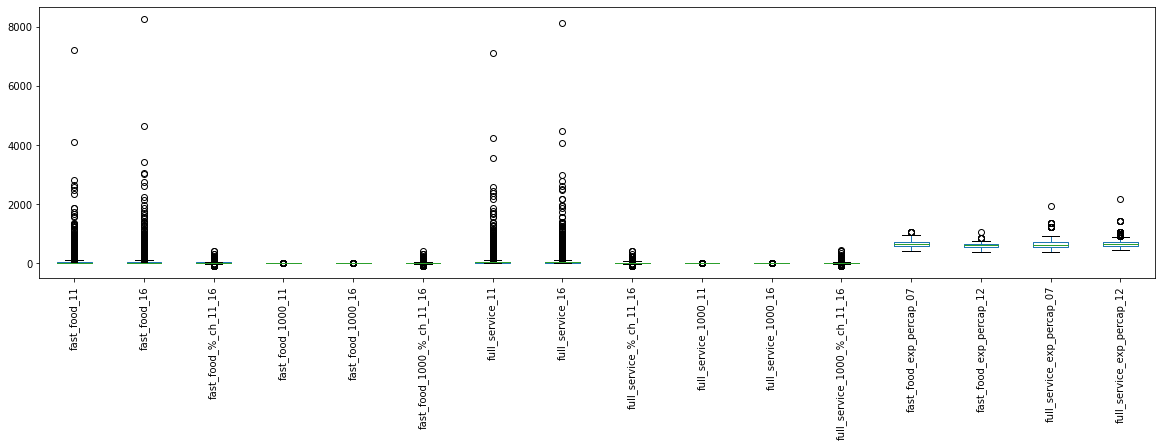

In [33]:
# df_working.boxplot(figsize=(10,8))

df_working.plot(kind='box', rot=90, figsize=(20,5))
plt.xlabel("")
plt.show()